In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Preprocessing & Sanity Check

In [105]:
sample_data = pd.read_csv('/Users/tinglu/Tesla-DE-OA/sample_interview.csv') # set path

In [106]:
sample_data.head()

,phoneID,criteriaA,criteriaB,criteriaC,TotalPartsInspected,classification
0,1,24,31,30,31,A
1,2,31,29,27,31,C
2,3,29,31,30,31,C
3,4,28,28,29,30,A
4,5,25,28,27,31,B


In [107]:
print(sample_data.columns)

Index(['phoneID', 'criteriaA', 'criteriaB', 'criteriaC', 'TotalPartsInspected',
       'classification'],
      dtype='object')


In [108]:
# check the number for each group, to see whether there is an imbalance
sample_data.groupby(by= 'classification')['TotalPartsInspected'].sum()

classification
A     9416
B    11093
C    10229
D    10718
E    10609
Name: TotalPartsInspected, dtype: int64

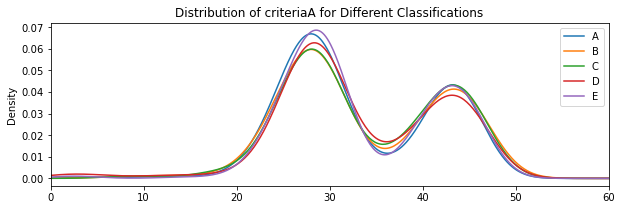

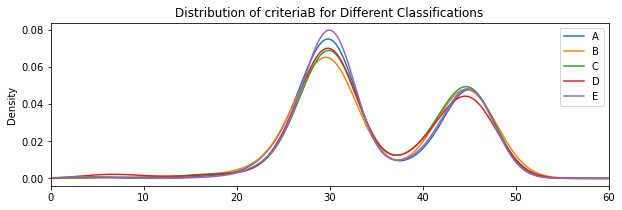

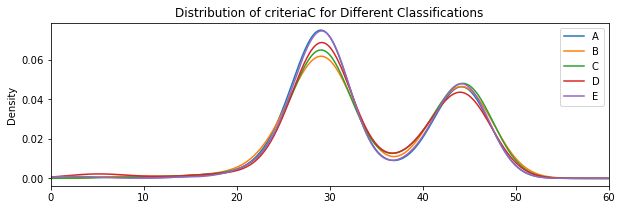

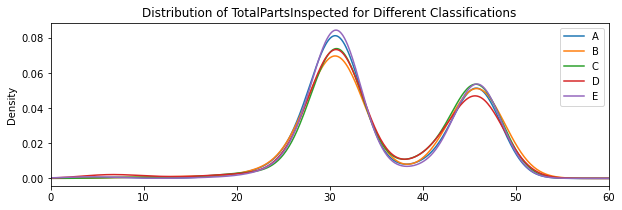

In [109]:
# check the distribution of the each column for different class
# no big difference 
cols_to_vis = ['criteriaA', 'criteriaB', 'criteriaC', 'TotalPartsInspected']
classifications_to_vis = ['A', 'B', 'C', 'D', 'E']

for col in cols_to_vis:
    plt.figure(figsize=(10, 3)) 
    for classification in classifications_to_vis:
        # Plot the density for the current classification group
        sample_data[sample_data['classification'] == classification][col].plot(kind='density', label=classification)
    
    plt.xlim(0, 60)
    plt.legend()
    plt.title(f'Distribution of {col} for Different Classifications')
    plt.show()

In [110]:
sample_data['criteriaA_pass_through_rate']= sample_data['criteriaA']\
                                              /sample_data['TotalPartsInspected'] 
sample_data['criteriaB_pass_through_rate']= sample_data['criteriaB']\
                                              /sample_data['TotalPartsInspected'] 
sample_data['criteriaC_pass_through_rate']= sample_data['criteriaC']\
                                              /sample_data['TotalPartsInspected'] 
sample_data['criteria_overall_pass_through_rate']= (sample_data['criteriaA_pass_through_rate']\
                                                  + sample_data['criteriaB_pass_through_rate']\
                                                  + sample_data['criteriaC_pass_through_rate'])/3

In [111]:
average_pass_rate= sample_data.groupby(by= 'classification')['criteriaA_pass_through_rate'\
                                          , 'criteriaB_pass_through_rate'\
                                          , 'criteriaC_pass_through_rate'\
                                          , 'criteria_overall_pass_through_rate'].mean()

average_pass_rate

/var/folders/yd/gr4d6_4j5ll9lsg77w9grlq00000gn/T/ipykernel_80320/1544521152.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_pass_rate= sample_data.groupby(by= 'classification')['criteriaA_pass_through_rate'\


,criteriaA_pass_through_rate,criteriaB_pass_through_rate,criteriaC_pass_through_rate,criteria_overall_pass_through_rate
classification,,,,
A,0.922312,0.972527,0.954154,0.949665
B,0.923759,0.969776,0.951898,0.948478
C,0.924860,0.969386,0.954095,0.949447
D,0.921928,0.973207,0.950922,0.948686
E,0.927458,0.973221,0.949984,0.950221


#### ANVOA

In [112]:
from scipy.stats import f_oneway

for criteria in ['criteriaA_', 'criteriaB_', 'criteriaC_', 'criteria_overall_']:
  class1= sample_data[sample_data['classification']=='A'][criteria+ 'pass_through_rate']
  class2= sample_data[sample_data['classification']=='B'][criteria+ 'pass_through_rate']
  class3= sample_data[sample_data['classification']=='C'][criteria+ 'pass_through_rate']
  class4= sample_data[sample_data['classification']=='D'][criteria+ 'pass_through_rate']
  class5= sample_data[sample_data['classification']=='E'][criteria+ 'pass_through_rate']

  # Conduct the one-way ANOVA
  # no significant difference 
  print(f_oneway(class1, class2, class3, class4, class5))

F_onewayResult(statistic=0.3142012078169908, pvalue=0.8686060600195362)
F_onewayResult(statistic=0.8109150447093926, pvalue=0.5181325122256584)
F_onewayResult(statistic=0.48354558528619307, pvalue=0.7478550706675178)
F_onewayResult(statistic=0.1380445734138652, pvalue=0.9681975268029033)


#### Distribution & Interval

In [113]:
# check the distribution of the each column for different rate
# for col in ['criteriaA_pass_through_rate', 'criteriaB_pass_through_rate', 'criteriaC_pass_through_rate',
#                 'criteria_overall_pass_through_rate']:
#   plt.subplots(figsize= (10,5))
#   i= 1
#   for classification in ['A', 'B', 'C', 'D', 'E']:
#     # plt.subplot(1, 5, i) 
#     sample_data[sample_data['classification']==classification][col].plot(kind='density', label=classification)
#   plt.title(col)
#   plt.xlim(0.8, 1.1)
#   plt.legend()
#   plt.show()

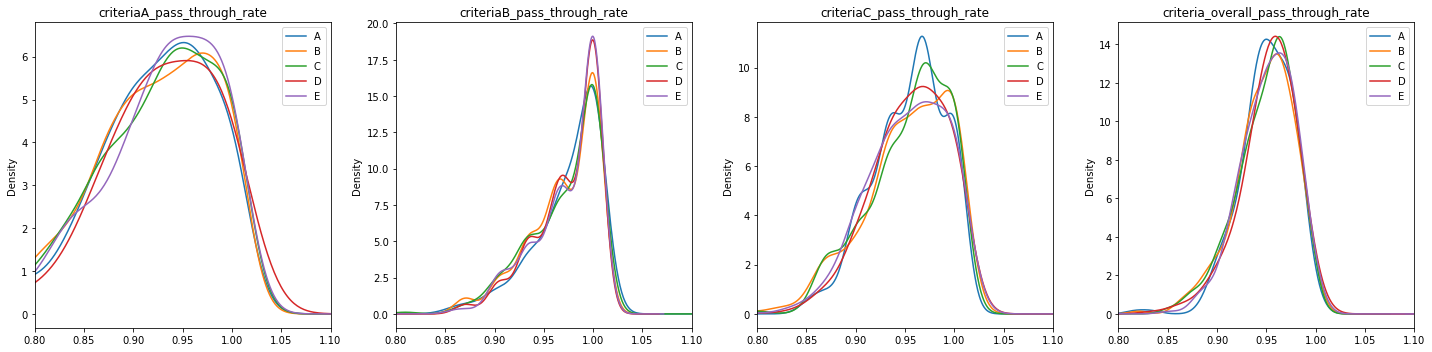

In [114]:
columns_to_plot = ['criteriaA_pass_through_rate', 'criteriaB_pass_through_rate', 'criteriaC_pass_through_rate',
                   'criteria_overall_pass_through_rate']
classifications = ['A', 'B', 'C', 'D', 'E']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

# Loop through the columns and plot on each subplot
for i, col in enumerate(columns_to_plot):
    for classification in classifications:
        data_to_plot = sample_data[sample_data['classification'] == classification][col]
        data_to_plot.plot(kind='density', label=classification, ax=axes[i])

    # Add subplot title and legend
    axes[i].set_title(col)
    axes[i].set_xlim(0.8, 1.1)
    axes[i].legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


In [115]:
from scipy.stats import norm, bootstrap
from statsmodels.stats.proportion import proportion_confint

cols_to_vis = ['criteriaA_pass_through_rate', 'criteriaB_pass_through_rate', 'criteriaC_pass_through_rate', 'criteria_overall_pass_through_rate']

result_data = []
for col in cols_to_vis:
    conf_interval= sample_data.groupby(by= 'classification')[col].apply(lambda x: proportion_confint(sum(x), len(x), alpha=0.05, method='normal'))

    conf_interval[col] = conf_interval.to_frame(name=f'95% CI of {col}')

    print(conf_interval[col])


                   95% CI of criteriaA_pass_through_rate
classification                                          
A               (0.8900224003543821, 0.9546015206237423)
B               (0.8938781944182362, 0.9536407513085935)
C               (0.8939830136804066, 0.9557379149727228)
D               (0.8915694986712414, 0.9522868918367945)
E               (0.8979086098280625, 0.9570068862141633)
                   95% CI of criteriaB_pass_through_rate
classification                                          
A               (0.9528101954528408, 0.9922447116040937)
B               (0.9504986488967079, 0.9890527478867627)
C               (0.9492084327527548, 0.9895641788537803)
D               (0.9549349342809894, 0.9914798934804667)
E               (0.9548298253598092, 0.9916119003838156)
                   95% CI of criteriaC_pass_through_rate
classification                                          
A               (0.9289248936546237, 0.9793834951402476)
B               (0.927803948961

In [116]:
SD_pass_rate= sample_data.groupby(by= 'classification')['criteriaA_pass_through_rate'\
                                          , 'criteriaB_pass_through_rate'\
                                          , 'criteriaC_pass_through_rate'\
                                          , 'criteria_overall_pass_through_rate'].std().round(4)

SD_pass_rate

/var/folders/yd/gr4d6_4j5ll9lsg77w9grlq00000gn/T/ipykernel_80320/24658723.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  SD_pass_rate= sample_data.groupby(by= 'classification')['criteriaA_pass_through_rate'\


,criteriaA_pass_through_rate,criteriaB_pass_through_rate,criteriaC_pass_through_rate,criteria_overall_pass_through_rate
classification,,,,
A,0.0610,0.0414,0.0358,0.0304
B,0.0587,0.0346,0.0453,0.0299
C,0.0610,0.0380,0.0402,0.0291
D,0.0889,0.0322,0.0518,0.0417
E,0.0640,0.0328,0.0503,0.0329


#### Regression Modeling

In [117]:
sample_data.columns

Index(['phoneID', 'criteriaA', 'criteriaB', 'criteriaC', 'TotalPartsInspected',
       'classification', 'criteriaA_pass_through_rate',
       'criteriaB_pass_through_rate', 'criteriaC_pass_through_rate',
       'criteria_overall_pass_through_rate'],
      dtype='object')

In [118]:
import statsmodels.formula.api as smf

In [119]:
for target in ['criteriaA_pass_through_rate', 'criteriaB_pass_through_rate', 'criteriaC_pass_through_rate'\
              , 'criteria_overall_pass_through_rate']:
  mod = smf.ols(formula= target + ' ~ C(classification) + TotalPartsInspected', data=sample_data)
  res = mod.fit()
  print(res.summary())
  print('---------------------------------------------------------------------------------------------------')
  print('\t')


                                 OLS Regression Results                                
Dep. Variable:     criteriaA_pass_through_rate   R-squared:                       0.104
Model:                                     OLS   Adj. R-squared:                  0.101
Method:                          Least Squares   F-statistic:                     33.27
Date:                         Sun, 28 Jan 2024   Prob (F-statistic):           3.26e-32
Time:                                 14:24:06   Log-Likelihood:                 1914.8
No. Observations:                         1443   AIC:                            -3818.
Df Residuals:                             1437   BIC:                            -3786.
Df Model:                                    5                                         
Covariance Type:                     nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Question Answering

Please specify all assumptions that you took while answering the above two questions.


#### Assumption: 


*   The parts selected for inspections are randomly selected from the population, which can well represent the overall situation.
*   The quality of parts are approximately on the same level, and the cost of producing parts for different classification is also similar, which is basically to make sure that different classifications are comparable.

 

#### Q1

What are the key quantitative metrics you would use to compare the different phone groups? Why did you choose these metrics? Please be specific in how you define each metric.




---



---


Metrics:

*   Average pass rate for each criteria per class = 

  number of parts pass the criteria of a specific class (A/B/C/D/E) / total number of parts inspected of a specific class (A/B/C/D/E)

*   Overall criterion pass rate per class = average pass rate of criteriaA/B/C of a specific class (A/B/C/D/E)

Reason for choosing:


*   Since the sanity check shows that the total number of parts inspected is similar among all classification, therefore we can use the ratio to compare the situation of different classifications.

*   Since there are three criterion and the parts that undergo all three zones are the same, therefore taking the average of pass rate of the three criterion has no bias towards specific measurement, but can use as a overall evaluation metric.




#### Q2

Provide a corresponding recommendation supported by data visualization and narratives of which phone classification group has the highest quality of phones. 



---



---



*   Comparably,  the classification E has a slightly higher quality of phones.  
*   The ANOVA test shows that there is no significant difference of each metric among different classes. 
*   The table of average value of different metrics as well as the distribution plots for each class shows that the classification E has a relatively higher pass rate for criteria A, B and overall only a slightly lower pass rate than other classes using criteria C.
*   Using the `classification` and `TotalPartsInspected` to regress on different metrics, the summary table align on the same conclusion: while other conditions are the same, the classification E has a relatively higher performance than other classes.


